# IDL Final Project: Dense layers

##### By Joan Ariño, Miguel Cidrás, Tomàs Ortega, Esteve Tarragó

In dense layers, also know as fully-connected layers, each neuron is connected to all neurons in the layer before. Each connection has a weight $W$ and the activation function of the neuron is $f = f(W \times X + b)$ where $W$ is a vector of weights and $b$ is the bias of the neuron.

The number of parameters of a dense layer is $(I +1) \times O$ where $I$ is the number of neurons in the layer before and $O$ the number of neurons in this layer.
Therefore if we increase the size of the layers and the number of them we are increasing the number of parameters. Being $N$ the number of layers and $S$ the size the number of parameters is $P = (S+1) \times S \times N$.
We can expect then than with a higher number of parameters our model will be able to fit better the training data which may lead to overfitting if we don't control it well with a validation dataset.

We import all the libraries we will be using.

In [17]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.datasets import mnist
from keras.utils import np_utils

We load the data in two separated sets: trains set and test set. We also normalize the data, so the values will be in (0, 1)

In [18]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.
print(X_train.shape)

(60000, 28, 28, 1)


In [19]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

We will explore the options of 1 to 4 layers and each layer with a size of 50 to 200

In [20]:
min_layers = 1
max_layers = 5
min_size= 50;
max_size= 250;
size_step = 50

We make a model for each option we want to explore and we store the results.
Since redoing the calculations is very time consuming and we had set $verbose = 2$ in the previous run, we do not modify it.

In [21]:
histories = dict()
scores = dict()
for size_layers in range(min_size,max_size,size_step):
    histories[size_layers] = dict()
    scores[size_layers] = dict()
    for num_layers in range(min_layers,max_layers):
        print ('Layer size:', size_layers , ". Number of layers:" , num_layers)
        model = Sequential()
        model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        for i in range (num_layers):
            model.add(Dense(size_layers, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        histories[size_layers][num_layers] = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2) #optimitzation reaches a plateau before 10 epochs in most of the cases
        scores[size_layers][num_layers] = model.evaluate(X_test, y_test, verbose=0)

Layer size: 50 . Number of layers: 1
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 42s - loss: 0.2839 - acc: 0.9203 - val_loss: 0.0884 - val_acc: 0.9731
Epoch 2/10
 - 43s - loss: 0.0835 - acc: 0.9754 - val_loss: 0.0548 - val_acc: 0.9834
Epoch 3/10
 - 43s - loss: 0.0589 - acc: 0.9825 - val_loss: 0.0435 - val_acc: 0.9865
Epoch 4/10
 - 42s - loss: 0.0474 - acc: 0.9860 - val_loss: 0.0425 - val_acc: 0.9858
Epoch 5/10
 - 42s - loss: 0.0403 - acc: 0.9877 - val_loss: 0.0387 - val_acc: 0.9869
Epoch 6/10
 - 41s - loss: 0.0336 - acc: 0.9897 - val_loss: 0.0362 - val_acc: 0.9880
Epoch 7/10
 - 42s - loss: 0.0298 - acc: 0.9904 - val_loss: 0.0312 - val_acc: 0.9903
Epoch 8/10
 - 41s - loss: 0.0261 - acc: 0.9918 - val_loss: 0.0370 - val_acc: 0.9868
Epoch 9/10
 - 42s - loss: 0.0224 - acc: 0.9933 - val_loss: 0.0338 - val_acc: 0.9882
Epoch 10/10
 - 42s - loss: 0.0211 - acc: 0.9931 - val_loss: 0.0360 - val_acc: 0.9887
Layer size: 50 . Number of layers: 2
Train on 60000 samples, validate on

 - 51s - loss: 0.0157 - acc: 0.9948 - val_loss: 0.0366 - val_acc: 0.9880
Epoch 10/10
 - 51s - loss: 0.0134 - acc: 0.9954 - val_loss: 0.0336 - val_acc: 0.9896
Layer size: 150 . Number of layers: 2
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 52s - loss: 0.2452 - acc: 0.9287 - val_loss: 0.0740 - val_acc: 0.9755
Epoch 2/10
 - 51s - loss: 0.0705 - acc: 0.9787 - val_loss: 0.0508 - val_acc: 0.9832
Epoch 3/10
 - 52s - loss: 0.0478 - acc: 0.9852 - val_loss: 0.0391 - val_acc: 0.9877
Epoch 4/10
 - 50s - loss: 0.0372 - acc: 0.9881 - val_loss: 0.0393 - val_acc: 0.9871
Epoch 5/10
 - 51s - loss: 0.0283 - acc: 0.9909 - val_loss: 0.0381 - val_acc: 0.9882
Epoch 6/10
 - 51s - loss: 0.0241 - acc: 0.9921 - val_loss: 0.0336 - val_acc: 0.9892
Epoch 7/10
 - 50s - loss: 0.0194 - acc: 0.9941 - val_loss: 0.0334 - val_acc: 0.9908
Epoch 8/10
 - 52s - loss: 0.0141 - acc: 0.9954 - val_loss: 0.0341 - val_acc: 0.9895
Epoch 9/10
 - 51s - loss: 0.0146 - acc: 0.9951 - val_loss: 0.0404 - val_acc: 0.987

This plot represents the error of each model that we had explored.
Since this is hard to read, we will explain each case with more detail.

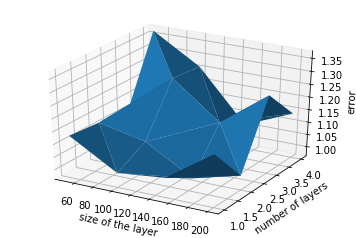

In [88]:
X = []
Y = []
Z = []
for size_layers in range(min_size,max_size,size_step):
    for num_layers in range(min_layers,max_layers):
        X.append(size_layers)
        Y.append(num_layers)
        Z.append(100-100*scores[size_layers][num_layers][1])
ax = plt.axes(projection='3d')
ax.plot_trisurf(X, Y, Z)
ax.set_xlabel('size of the layer')
ax.set_ylabel('number of layers')
ax.set_zlabel('error')
plt.show()

Here, we compare the error of different models with the same layer size and different number of layers.
We observe that in the case of layers of size 50 there is overfitting with more than three layers.
In the case of layers of bigger size, we can not assume that there is overfitting since we may have not trained them enough.

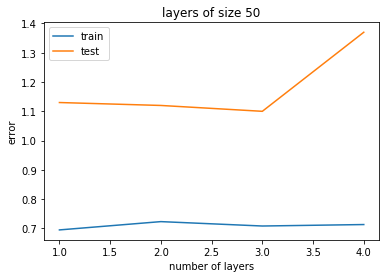

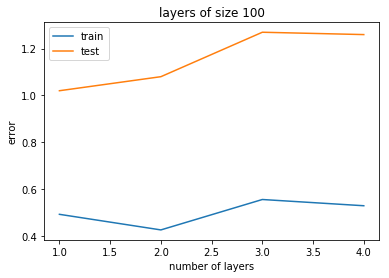

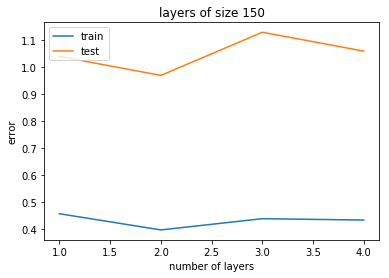

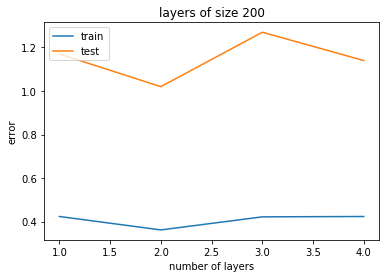

In [124]:
for size_layers in range(min_size,max_size,size_step):
    X = []
    Y1 = []
    Y2 = []
    for num_layers in range(min_layers,max_layers):
        X.append(num_layers)
        Y1.append(100-100*histories[size_layers][num_layers].history['acc'][9])
        Y2.append(100-100*histories[size_layers][num_layers].history['val_acc'][9])
    plt.plot(X,Y1)
    plt.plot(X,Y2)
    plt.xlabel('number of layers')
    plt.ylabel('error')
    plt.title('layers of size ' + str(size_layers))
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Here, we compare the error of different models with the same number of layers and different layer size.
We observe that in the case of one layers, there is overfitting with layer size bigger than 100.
In the case of more layers, we can not assume that there is overfitting since we may have not trained them enough.

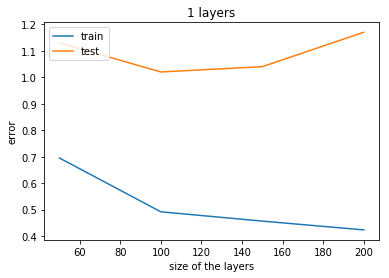

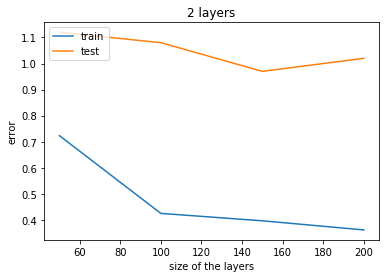

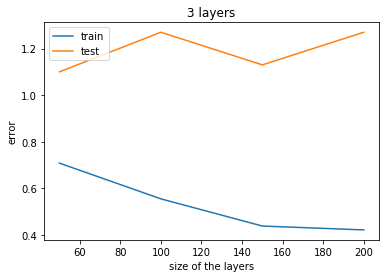

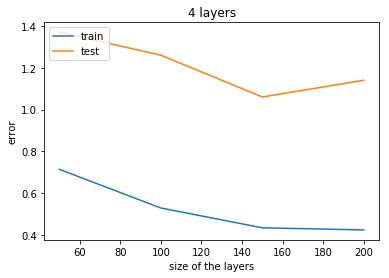

In [125]:
for num_layers in range(min_layers,max_layers):
    X = []
    Y1 = []
    Y2 = []

    for size_layers in range(min_size,max_size,size_step):
        X.append(size_layers)
        Y1.append(100-100*histories[size_layers][num_layers].history['acc'][9])
        Y2.append(100-100*histories[size_layers][num_layers].history['val_acc'][9])
    plt.plot(X,Y1)
    plt.plot(X,Y2)
    plt.xlabel('size of the layers')
    plt.ylabel('error')
    plt.title(str(num_layers) + ' layers')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

We can suspect that with many layers and with bigger sizes, it would induce overfitting as for a very complex model it is more dificult to generalize.
Our conclusion is that the best model is near to the complexity of two layers of size 150.

### Summary

- With more layers, we increase the backpropagation and the complexity linearly
- With bigger size, we increse the complexity quadraticaly
- For a complex model it is difficult to generalize and it is easy to have overfitting.
- We must find a balance between the computational cost and the complexity of the model, while watching out for overfitting.